In [74]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from google.colab import files

In [75]:
root = r'D:\Users\Arkady\Verint\Coursera_2019_Tensorflow_Specialization\Course2_CNN_in_TF\tmp\\'

In [81]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        # Your code starts here
        csv_reader = csv.reader(training_file, delimiter=',')
        line_count = 0
        cnt = 0
        labels = np.array([], dtype=np.integer)
        for row in csv_reader:
            if line_count == 0:
                line_count += 1
            else:
                label = row[0]
                labels = np.append(labels, label)
                cnt = len(row)
                npa = np.asarray(row[1:cnt], dtype=np.float32)
                l2 = np.array_split(npa, 28)
                image = np.asarray(l2)
                image = np.expand_dims(image, axis=0)
                if line_count == 1:
                    images = image
                else:
                    images = np.vstack([images,image])
                #print(line_count, label, image.shape)
                line_count +=1
    # Your code ends here
        return images, labels

#trainpath = root + 'sign_mnist_train.csv'
#testpath = root + 'sign_mnist_test.csv'
trainpath = r"D:\Users\Arkady\Verint\Coursera_2019_Tensorflow_Specialization\Course2_CNN_in_TF\tmp\sign_mnist_train.csv"
testpath = r"D:\Users\Arkady\Verint\Coursera_2019_Tensorflow_Specialization\Course2_CNN_in_TF\tmp\sign_mnist_test.csv"
print(trainpath)
print(testpath)
training_images, training_labels = get_data(trainpath)
testing_images, testing_labels = get_data(testpath)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

D:\Users\Arkady\Verint\Coursera_2019_Tensorflow_Specialization\Course2_CNN_in_TF\tmp\sign_mnist_train.csv
D:\Users\Arkady\Verint\Coursera_2019_Tensorflow_Specialization\Course2_CNN_in_TF\tmp\sign_mnist_test.csv
(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [85]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
        rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'    )

validation_datagen = ImageDataGenerator(
    rescale = 1./255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [97]:
from collections import Counter
words = ['a', 'b', 'c', 'a', 'b', 'b', 'c']

print(Counter(words).keys()) # equals to list(set(words))
print(Counter(words).values()) # counts the elements' frequency
print(len(Counter(words)))
print(len(training_labels), len(Counter(training_labels)))
print(len(testing_labels), len(Counter(testing_labels)))

dict_keys(['a', 'b', 'c'])
dict_values([2, 3, 2])
3
27455 24
7172 24


In [ ]:
from collections import Counter
from keras.utils import to_categorical

training_labels_binary = to_categorical(training_labels)
testing_labels_binary = to_categorical(testing_labels)
num_classes = training_labels_binary.shape[1]
print('num_classes:', num_classes)

# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()
    
# Compile Model. 
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(
    train_datagen.flow(training_images, training_labels_binary, batch_size=32),
    #validation_data=(testing_images, testing_labels_binary),
    validation_data=validation_datagen.flow(testing_images, testing_labels_binary, batch_size=32),
    steps_per_epoch=len(training_images) / 32, 
    epochs=25)

model.evaluate(testing_images, testing_labels_binary)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


num_classes: 25
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 800)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 800)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 2

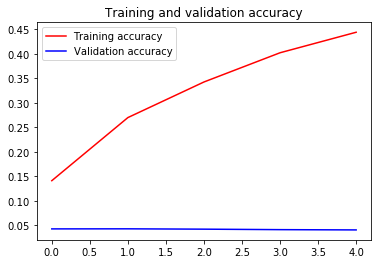

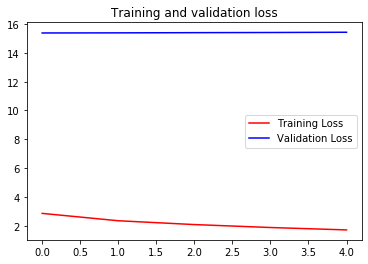

In [115]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()